# Predicting diabetes

## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

## Load and review Data

In [2]:
pidata = pd.read_csv("./data/pima-data.csv")

In [3]:
pidata.shape

(768, 10)

In [4]:
pidata.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


## Checking for null values

In [5]:
pidata.isnull().values.any()

False

In [6]:
def correlation_plot(df, size = 11):
    correlation = df.corr()
    fig, ax = plt.subplots(figsize = (size, size))
    ax.matshow(correlation)
    plt.xticks(range(len(correlation.columns)), correlation.columns)
    plt.yticks(range(len(correlation.columns)), correlation.columns)

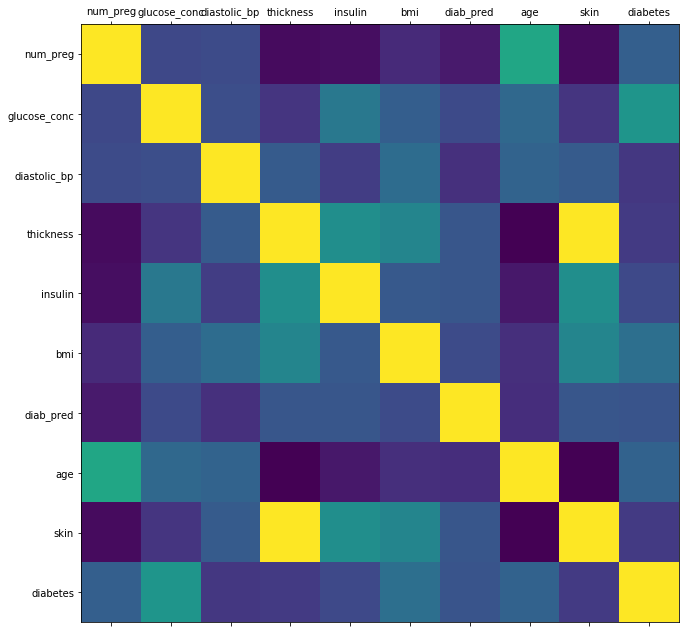

In [7]:
correlation_plot(pidata)

In [8]:
pidata.corr()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,-0.081672,0.221898
glucose_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.057328,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.207371,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.436783,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.392573,0.292695
diab_pred,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.183928,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,-0.113970,0.238356
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,0.074752,1.000000


In [9]:
del pidata['skin']

In [10]:
pidata.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True
3,1,89,66,23,94,28.1,0.167,21,False
4,0,137,40,35,168,43.1,2.288,33,True


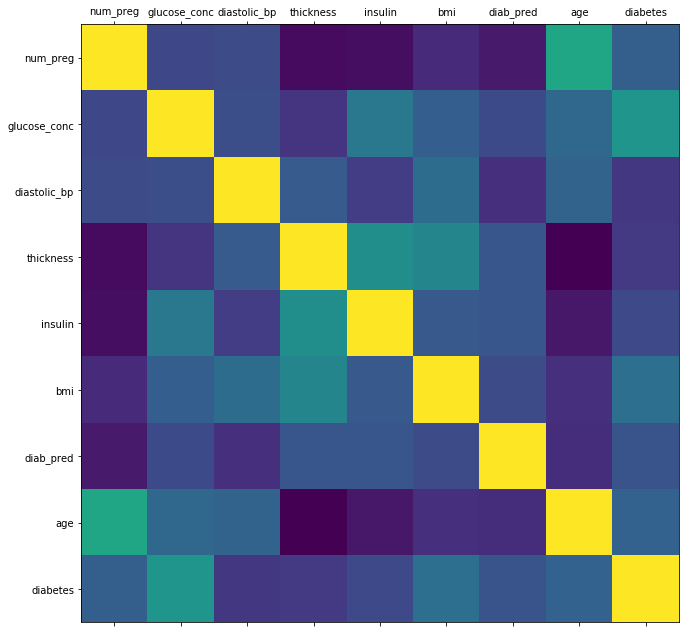

In [11]:
correlation_plot(pidata)

## Checking Data Types

In [12]:
pidata.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True
3,1,89,66,23,94,28.1,0.167,21,False
4,0,137,40,35,168,43.1,2.288,33,True


In [13]:
diabetes_map = {True: 1, False: 0}

In [14]:
pidata['diabetes'] = pidata['diabetes'].map(diabetes_map)

In [15]:
pidata.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Check true/false ratio

In [16]:
num_true = len(pidata.loc[pidata['diabetes'] == True])
num_false = len(pidata.loc[pidata['diabetes'] == False])
print("Number of True ca ses: {0} ({1:2.2f}%)".format(num_true, (num_true/(num_true + num_false)) * 100))
print("Number of False cases: {0} ({1:2.2f}%)".format(num_false, (num_false/(num_true + num_false)) * 100))


Number of True ca ses: 268 (34.90%)
Number of False cases: 500 (65.10%)


## Splitting the Data
Have to ensure 70% for training and 30% for testing

In [17]:
from sklearn.model_selection import train_test_split

feature_col_names = ['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin', 'bmi', 'diab_pred', 'age', 'diabetes']
predicted_class_name = ['diabetes']

In [18]:
x = pidata[feature_col_names].values
y = pidata[predicted_class_name].values
split_test_size = 0.30

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = split_test_size, random_state=42)

In [20]:
print("{0:0.2f}% in training set".format((len(x_train)/len(pidata.index))* 100))
print("{0:0.2f}% in testing set".format((len(x_test)/len(pidata.index))* 100))

69.92% in training set
30.08% in testing set


## Post split Data Prep

### Hidden Missing Values

In [21]:
pidata.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [22]:
print("No. of rows in dataframe {0}".format(len(pidata)))
print("No. of rows missing glucose_conc: {0}".format(len(pidata.loc[pidata['glucose_conc']==0])))

No. of rows in dataframe 768
No. of rows missing glucose_conc: 5


In [23]:
print("No. of rows missing diastolic_bp: {0}".format(len(pidata.loc[pidata['diastolic_bp']==0])))
print("No. of rows missing thickness: {0}".format(len(pidata.loc[pidata['thickness']==0])))
print("No. of rows missing insulin: {0}".format(len(pidata.loc[pidata['insulin']==0])))
print("No. of rows missing bmi: {0}".format(len(pidata.loc[pidata['bmi']==0])))
print("No. of rows missing diab_pred: {0}".format(len(pidata.loc[pidata['diab_pred']==0])))
print("No. of rows missing age: {0}".format(len(pidata.loc[pidata['age']==0])))


No. of rows missing diastolic_bp: 35
No. of rows missing thickness: 227
No. of rows missing insulin: 374
No. of rows missing bmi: 11
No. of rows missing diab_pred: 0
No. of rows missing age: 0


### Missing Data
a) Ignore
b) Drop Observations
c) Replace values

### Imputing with mean

In [24]:
from sklearn.preprocessing import Imputer

In [25]:
fill_0 = Imputer(missing_values=0, strategy="mean", axis=0)

x_train = fill_0.fit_transform(x_train)
x_test = fill_0.fit_transform(x_test)

## Training with Naive Bayes

In [26]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(x_train, y_train.ravel())

GaussianNB(priors=None)

In [27]:
nb_predit_train = nb_model.predict(x_train)

In [28]:
from sklearn import metrics

In [29]:
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, nb_predit_train)))
print()

Accuracy: 0.7542



### Performance on Testing Data

In [30]:
nb_predict_test = nb_model.predict(x_test)
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, nb_predict_test)))

Accuracy: 0.7359


### Confusion Matrix and classification report

In [31]:
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test, nb_predict_test, labels=[1, 0])))
print("")

print("Classification Report")
print(metrics.classification_report(y_test, nb_predict_test, labels=[1,0]))

Confusion Matrix
[[ 52  28]
 [ 33 118]]

Classification Report
             precision    recall  f1-score   support

          1       0.61      0.65      0.63        80
          0       0.81      0.78      0.79       151

avg / total       0.74      0.74      0.74       231



recall = tp/sum of tp + fn

precision = tp/tp + fp

## Training with Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state = 42)
rf_model.fit(x_train, y_train.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False)

### Predict Training Data

In [33]:
rf_predict_train = rf_model.predict(x_train)
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, rf_predict_train)))

Accuracy: 0.9870


In [34]:
rf_predict_test = rf_model.predict(x_test)
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, rf_predict_test)))

Accuracy: 0.7186


### Classification Report and Confusion Matrix

Confusion Matrix

In [35]:
print("{0}".format(metrics.confusion_matrix(y_test, rf_predict_test, labels=[1,0])))

[[ 45  35]
 [ 30 121]]


Classification Report

In [36]:
print(metrics.classification_report(y_test, rf_predict_test, labels = [1,0]))

             precision    recall  f1-score   support

          1       0.60      0.56      0.58        80
          0       0.78      0.80      0.79       151

avg / total       0.71      0.72      0.72       231



 Such high accuracy for training data but low for test data - overfitting, i.e., the model learnt the training data too well

2 ways to solve overfitting - a) regularization hyperparameter b) cross validation - both can be used at the same time

accuracy w/ training data and accuracy with testing/real world data - bias-variance tradeoff

## Training with logistic regression

In [37]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(C=0.7, random_state=42)
lr_model.fit(x_train,y_train.ravel())

lr_predict_test = lr_model.predict(x_test)
print("Accuracy: {0}".format(metrics.accuracy_score(y_test, lr_predict_test)))
print("Confusion Matrix")
print(metrics.confusion_matrix(y_test, lr_predict_test, labels=[1,0]))
print("")
print("Classification report")
print(metrics.classification_report(y_test, lr_predict_test, labels=[1,0]))

Accuracy: 0.7619047619047619
Confusion Matrix
[[ 49  31]
 [ 24 127]]

Classification report
             precision    recall  f1-score   support

          1       0.67      0.61      0.64        80
          0       0.80      0.84      0.82       151

avg / total       0.76      0.76      0.76       231



Setting Regularization parameter that returns highest recall

1st max value of 0.738 occured at C=0.200


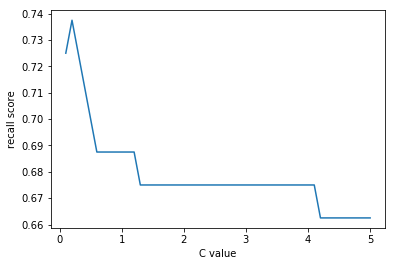

In [42]:
C_start = 0.1
C_end = 5
C_inc = 0.1

C_values, recall_scores = [], []

C_val = C_start
best_recall_score = 0
while (C_val < C_end):
    C_values.append(C_val)
    lr_model_loop = LogisticRegression(C=C_val, class_weight="balanced", random_state=42)
    lr_model_loop.fit(x_train, y_train.ravel())
    lr_predict_loop_test = lr_model_loop.predict(x_test)
    recall_score = metrics.recall_score(y_test, lr_predict_loop_test)
    recall_scores.append(recall_score)
    if (recall_score > best_recall_score):
        best_recall_score = recall_score
        best_lr_predict_test = lr_predict_loop_test
        
    C_val = C_val + C_inc

best_score_C_val = C_values[recall_scores.index(best_recall_score)]
print("1st max value of {0:.3f} occured at C={1:.3f}".format(best_recall_score, best_score_C_val))

%matplotlib inline 
plt.plot(C_values, recall_scores, "-")
plt.xlabel("C value")
plt.ylabel("recall score")
